# Project Title

## Overview

#### A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

#### Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

- Straight from the competition website: 'Your goal is to predict the operating condition of a waterpoint for each record in the dataset.' 


#### Questions to consider:

- Who are your stakeholders?
    - The Stakeholder could be the company that fixes the pumps  
- What are your stakeholders' pain points related to this project?
    - The amount of repairs that need to be complete? 
    - 
- Why are your predictions important from a business perspective?
    - Predicting the operating condition of a waterpoint is important because of the water crisis in Tanzania. Many people in Tanzania are having to resort to contaminated rivers for drinking water which can cause disease and death. Predicting water pumps that are functional vs non-functional can help guide our Stakeholder where to direct their attention for repairs. 
    
- What exactly is your deliverable: your analysis, or the model itself?
    - deliverable would be the model 
    
- Does your business understanding/stakeholder require a specific type of model?
    - For example: a highly regulated industry would require a very transparent/simple/interpretable model, whereas a situation where the model itself is your deliverable would likely benefit from a more complex and thus stronger model
   

#### Additional questions to consider for classification:

- What does a false positive look like in this context?
    - False positive would be predicting a pump is functional but it actually isn't. 
    
- What does a false negative look like in this context?
    - Predicting a pump is not functional when it actually is functional. 
    
- Which is worse for your stakeholder?
    - Predicting a false positive where the pump is functional but it actually isn't because no we're not fixing a pump for a community that could use it. 
    
- What metric are you focusing on optimizing, given the answers to the above questions?
    

## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

In [1]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
# code here to explore your data
df = pd.read_csv('../../data/Training Set Labels.csv')
df1 = pd.read_csv('../../data/Training Set Values.csv')

In [3]:
water_wells = df1.merge(df, on='id')
water_wells.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [4]:
water_wells.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [5]:
#Drop repetitive columns
water_wells.drop('num_private', axis=1, inplace=True)
water_wells.drop('quantity_group', axis=1, inplace=True)
water_wells.drop('water_quality', axis=1, inplace=True)
water_wells.drop('payment', axis=1, inplace=True)
water_wells.drop('waterpoint_type', axis=1, inplace=True)
water_wells.drop('extraction_type_group', axis=1, inplace=True)
water_wells.drop('extraction_type', axis=1, inplace=True)
water_wells.drop('subvillage', axis=1, inplace=True)
water_wells.drop('district_code', axis=1, inplace=True)
water_wells.drop('scheme_name', axis=1, inplace=True)
water_wells.drop('wpt_name', axis=1, inplace=True)
water_wells.drop('recorded_by', axis=1, inplace=True)
water_wells.drop('management', axis=1, inplace=True)
water_wells.drop('date_recorded', axis=1, inplace=True)

In [6]:
#Replace machine dbh and hand dtw with borehole 
water_wells["source"].replace({"machine dbh": "borehole", "hand dtw": "hand dtw"}, inplace=True)

#Drop source type column because it combines river and lake and those bodies of water are very different. 
water_wells.drop('source_type', axis=1, inplace=True)

In [7]:
#We decided to put functional needs repair in the non functional group because we collectively agreed we don't want to drink water out of a well that needs repair
#
water_wells['status_group'].replace({"functional needs repair": "non functional"}, inplace=True)
water_wells['status_group'].value_counts()

functional        32259
non functional    27141
Name: status_group, dtype: int64

In [8]:
age = []
for year in water_wells['construction_year']: 
    if year > 0:
        age.append(2021-year)
    else: 
        age.append(15)

#find the average age of every well to fill the 0 years with. 
sum(age) / len(age)

water_wells['well_age'] = age

In [9]:
water_wells['quantity'].unique()

array(['enough', 'insufficient', 'dry', 'seasonal', 'unknown'],
      dtype=object)

In [10]:
#Ordinally encode the quantities in this order, enough, insufficient, seasonal, dry, unknown

quantity_rank = ['unknown', 'dry', 'seasonal', 'insufficient', 'enough']

enc = OrdinalEncoder(categories=[quantity_rank])
enc.fit(water_wells[['quantity']])

ranks = pd.DataFrame(enc.transform(water_wells[['quantity']]), columns=['quantity_rank'], index=water_wells.index)

water_wells['quantity_rank'] = ranks

display(water_wells['quantity_rank'].value_counts())
display(water_wells['quantity'].value_counts())

4.0    33186
3.0    15129
1.0     6246
2.0     4050
0.0      789
Name: quantity_rank, dtype: int64

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [11]:
water_wells['source_class'].value_counts()
water_wells['source_class'].replace({'unknown': 'surface'}, inplace=True)

In [12]:
#Use LabelBinarizer to encode the source class column. Groundwater = 0 and Surface = 1
jobs_encoder = LabelBinarizer()
jobs_encoder.fit(water_wells['source_class'])
transformed = jobs_encoder.transform(water_wells['source_class'])
ohe_df = pd.DataFrame(transformed)
water_wells = pd.concat([water_wells, ohe_df], axis=1)

In [13]:
#Rename newly encoded source class column to source_class_enc
water_wells.rename(columns={0: "source_class_enc"}, inplace=True)

In [14]:
water_wells.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,region_code,...,payment_type,quality_group,quantity,source,source_class,waterpoint_type_group,status_group,well_age,quantity_rank,source_class_enc
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,11,...,annually,good,enough,spring,groundwater,communal standpipe,functional,22,4.0,0
1,8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,20,...,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,functional,11,3.0,1
2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,21,...,per bucket,good,enough,dam,surface,communal standpipe,functional,12,4.0,1
3,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,90,...,never pay,good,dry,borehole,groundwater,communal standpipe,non functional,35,1.0,0
4,19728,0.0,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,18,...,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,functional,15,2.0,1


In [15]:
#Create a function to show the top 5 funders and make all other funders 'other'

def funder_top5(row):  
    '''Making top 5 values and setting the rest to 'other'''

    if row['funder']=='Government Of Tanzania':
        return 'Gov'
    elif row['funder']=='Danida':
        return 'Danida'
    elif row['funder']=='Hesawa':
        return 'Hesawa'
    elif row['funder']=='Rwssp':
        return 'Rwssp'
    elif row['funder']=='World Bank':
        return 'World_bank'    
    else:
        return 'other'
    
water_wells['funder'] = water_wells.apply(lambda row: funder_top5(row), axis=1)

In [16]:
#Feature Engineering: In target column, set functional = 1 and non functional = 0
str_to_num = {'functional':1,
                   'non functional':0}

water_wells['status_group']  = water_wells['status_group'].replace(str_to_num)

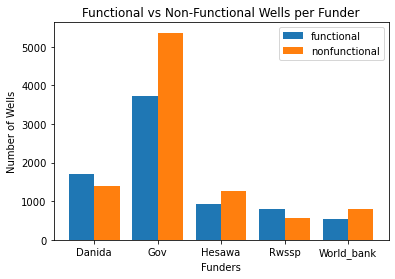

In [17]:
#Create double bar chart showing each funder's functional vs non functional wells. Hard coded values. 
  
X = ['Danida','Gov','Hesawa','Rwssp', 'World_bank']
Yfunctional = [1713, 3720, 936, 805, 545]
Znonfunctional = [1401, 5364, 1266, 569, 804]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Yfunctional, 0.4, label = 'functional')
plt.bar(X_axis + 0.2, Znonfunctional, 0.4, label = 'nonfunctional')
  
plt.xticks(X_axis, X)
plt.xlabel("Funders")
plt.ylabel("Number of Wells")
plt.title("Functional vs Non-Functional Wells per Funder")
plt.legend()
plt.show()

The government of Tanzania appears to have the most functional wells, but also the most non functional wells. 

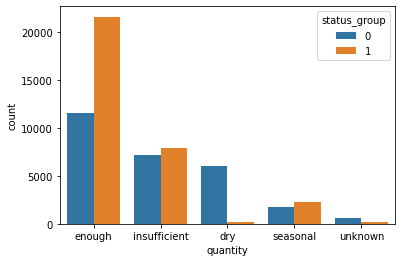

In [18]:
#Plot the quantity of water in each well to see which are functional and which are not. 
ax = sns.countplot(x='quantity', hue="status_group", data=water_wells)

The dried out wells are the ones that appear to be the least functional. It looks like even the wells that have enough water, many of them are non functional. 

In [19]:
old_wells = []
for age in water_wells['well_age']: 
    if age <= 21: 
        old_wells.append(age)

In [20]:
old_wells_df = water_wells.loc[water_wells['well_age'] >= 25]

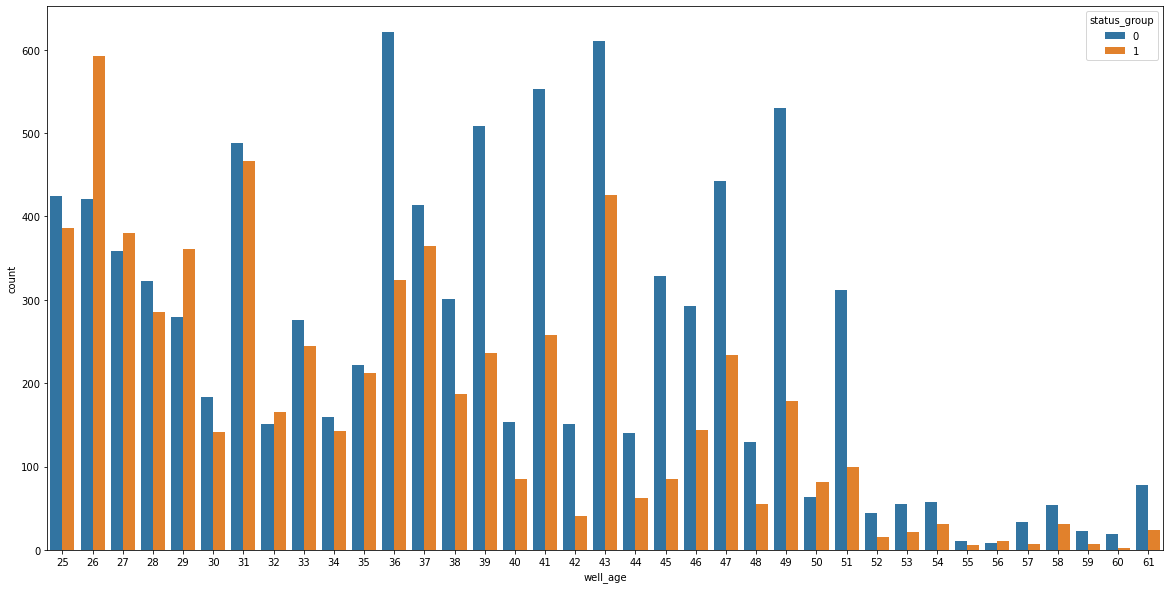

In [21]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='well_age', hue="status_group", data=old_wells_df)

From above we can see that wells older than 25 show a lot of non functioning wells. 

In [22]:
#OneHotEncode Funder Column 
ohe = OneHotEncoder(sparse=False)
funder_df1 = pd.DataFrame(ohe.fit_transform(water_wells[['funder']]))
water_wells = pd.concat([water_wells, funder_df1], axis=1)
water_wells = water_wells.rename({0: 'funder_danida', 1: 'funder_gov', 2: 'funder_hesawa', 3: 'funder_rwssp', 4: 'funder_worldbank', 5: 'funder_other'}, axis=1)

In [23]:
water_wells.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,region_code,...,status_group,well_age,quantity_rank,source_class_enc,funder_danida,funder_gov,funder_hesawa,funder_rwssp,funder_worldbank,funder_other
0,69572,6000.0,other,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,11,...,1,22,4.0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,8776,0.0,other,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,20,...,1,11,3.0,1,0.0,0.0,0.0,0.0,0.0,1.0
2,34310,25.0,other,686,World vision,37.460664,-3.821329,Pangani,Manyara,21,...,1,12,4.0,1,0.0,0.0,0.0,0.0,0.0,1.0
3,67743,0.0,other,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,90,...,0,35,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,19728,0.0,other,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,18,...,1,15,2.0,1,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
#Get all the numeric columns from the DataFrame
col_float = [c for c in water_wells.columns if water_wells[c].dtype == ('float64')]
col_int = [c for c in water_wells.columns if water_wells[c].dtype == ('int64')]
cat_cols = [c for c in water_wells.columns if water_wells[c].dtype == ('object')]
num_cols = col_float + col_int
num_cols

['amount_tsh',
 'longitude',
 'latitude',
 'quantity_rank',
 'funder_danida',
 'funder_gov',
 'funder_hesawa',
 'funder_rwssp',
 'funder_worldbank',
 'funder_other',
 'id',
 'gps_height',
 'region_code',
 'population',
 'construction_year',
 'status_group',
 'well_age',
 'source_class_enc']

In [59]:
water_wells[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   installer              55745 non-null  object
 1   basin                  59400 non-null  object
 2   region                 59400 non-null  object
 3   lga                    59400 non-null  object
 4   ward                   59400 non-null  object
 5   public_meeting         56066 non-null  object
 6   scheme_management      55523 non-null  object
 7   permit                 56344 non-null  object
 8   extraction_type_class  59400 non-null  object
 9   management_group       59400 non-null  object
 10  payment_type           59400 non-null  object
 11  quality_group          59400 non-null  object
 12  quantity               59400 non-null  object
 13  source                 59400 non-null  object
 14  source_class           59400 non-null  object
 15  waterpoint_type_gro

In [25]:
water_wells['status_group'].value_counts(normalize=True)

1    0.543081
0    0.456919
Name: status_group, dtype: float64

For the above model-less baseline prediction, if we guessed non functional for every well we'd be right only 46% of the time. 

In [26]:
#Create a holdout set to test at the end 
X = water_wells.drop(['status_group'], axis=1)
y = water_wells['status_group']

X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.1, random_state=42)

In [27]:
#Create new DataFrame for training data 
train = pd.concat([X_train, y_train], axis=1)
train.shape

(53460, 35)

### First Simple Model - Decision Tree

In [28]:
train

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,region_code,...,well_age,quantity_rank,source_class_enc,funder_danida,funder_gov,funder_hesawa,funder_rwssp,funder_worldbank,funder_other,status_group
44928,31080,0.0,other,0,WEDECO,33.179596,-4.214966,Internal,Tabora,14,...,15,3.0,1,0.0,0.0,0.0,0.0,0.0,1.0,1
31178,17282,50.0,other,-33,Tasaf,40.322805,-10.456297,Ruvuma / Southern Coast,Mtwara,99,...,13,4.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0
9485,72545,0.0,other,298,DWE,36.353508,-8.780099,Rufiji,Morogoro,5,...,30,3.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0
955,44490,0.0,Rwssp,0,RWSSP,33.071249,-3.803178,Lake Victoria,Shinyanga,17,...,15,4.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0
29186,67816,5.0,other,1088,DWE,37.271938,-3.283501,Pangani,Kilimanjaro,3,...,14,4.0,1,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,68525,1000.0,other,327,DWE,36.367112,-8.774761,Rufiji,Morogoro,5,...,26,4.0,1,0.0,0.0,0.0,0.0,0.0,1.0,1
38158,11980,1000.0,Danida,1743,DANID,34.531524,-9.769604,Lake Nyasa,Iringa,11,...,33,2.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1
860,35778,0.0,other,-13,Omar Ally,38.974416,-5.420823,Pangani,Tanga,4,...,16,3.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0
15795,49444,0.0,Rwssp,0,WEDECO,34.316586,-3.107161,Lake Victoria,Shinyanga,17,...,15,4.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [29]:
#First Simple Model, chose decision tree 
X = train[num_cols].drop('status_group', axis=1)
y = train['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
#Fit the model
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [31]:
#Default scorer is mean accuracy for Decision Tree 
dt.score(X_train, y_train)

0.7027060730764434

In [32]:
#Cross Val Score 
cv = cross_val_score(dt, X_train, y_train)
cv

array([0.70619778, 0.70220726, 0.69996259, 0.69846614, 0.69908966])

In [33]:
#Average Cross Val Score 
avg_cv = cv.mean()
avg_cv

0.7011846863698714

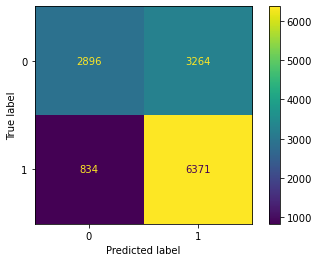

In [34]:
plot_confusion_matrix(dt, X_test, y_test)

### Metrics

In [35]:
y_preds = dt.predict(X_test)

In [36]:
#Accuracy Score 
acc = accuracy_score(y_test, y_preds)
acc

0.69337822671156

In [37]:
#Precision Score 
prec = precision_score(y_test, y_preds)
prec

0.6612350804359107

In [38]:
#Recall Score 
rec = recall_score(y_test, y_preds)
rec

0.8842470506592643

### Random Forest Model 

In [39]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.predict(X_train)

array([0, 0, 1, ..., 1, 0, 0])

In [40]:
water_wells.columns

Index(['id', 'amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'basin', 'region', 'region_code', 'lga', 'ward',
       'population', 'public_meeting', 'scheme_management', 'permit',
       'construction_year', 'extraction_type_class', 'management_group',
       'payment_type', 'quality_group', 'quantity', 'source', 'source_class',
       'waterpoint_type_group', 'status_group', 'well_age', 'quantity_rank',
       'source_class_enc', 'funder_danida', 'funder_gov', 'funder_hesawa',
       'funder_rwssp', 'funder_worldbank', 'funder_other'],
      dtype='object')

### k_Neighbors Classifier 

In [ ]:
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_cols),
                    ('cat', cat_transformer, cat_cols)])

In [49]:
knn = KNeighborsClassifier()

pipe = make_pipeline(preprocessor,knn)
scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')
print(scores.mean(), "+/-", scores.std())

## What are the columns?


amount_tsh - Total static head (amount water available to waterpoint)

date_recorded - The date the row was entered

funder - Who funded the well

gps_height - Altitude of the well

installer - Organization that installed the well

longitude - GPS coordinate

latitude - GPS coordinate

wpt_name - Name of the waterpoint if there is one

num_private -
basin - Geographic water basin

subvillage - Geographic location

region - Geographic location

region_code - Geographic location (coded)

district_code - Geographic location (coded)

lga - Geographic location

ward - Geographic location

population - Population around the well

public_meeting - True/False

recorded_by - Group entering this row of data

scheme_management - Who operates the waterpoint

scheme_name - Who operates the waterpoint

permit - If the waterpoint is permitted

construction_year - Year the waterpoint was constructed

extraction_type - The kind of extraction the waterpoint uses

extraction_type_group - The kind of extraction the waterpoint uses

extraction_type_class - The kind of extraction the waterpoint uses

management - How the waterpoint is managed

management_group - How the waterpoint is managed

payment - What the water costs

payment_type - What the water costs

water_quality - The quality of the water

quality_group - The quality of the water

quantity - The quantity of water

quantity_group - The quantity of water

source - The source of the water

source_type - The source of the water

source_class - The source of the water

waterpoint_type - The kind of waterpoint

waterpoint_type_group - The kind of waterpoint

## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?
- Can you pipeline your preparation steps to use them consistently in the modeling process?

In [ ]:
# code here to prepare your data

## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How will you analyze the data to arrive at an initial approach?
- How will you iterate on your initial approach to make it better?
- What model type is most appropriate, given the data and the business problem?

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any relevant modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?
- What does this final model tell you about the relationship between your inputs and outputs?

### Baseline Understanding

- What does a baseline, model-less prediction look like?

In [ ]:
# code here to arrive at a baseline prediction

### First $&(@# Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

In [ ]:
# code here for your first 'substandard' model

In [ ]:
# code here to evaluate your first 'substandard' model

### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

In [ ]:
# code here to iteratively improve your models

In [ ]:
# code here to evaluate your iterations

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

In [ ]:
# code here to show your final model

In [ ]:
# code here to evaluate your final model

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- How could the stakeholder use your model effectively?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?
